# 01: Football Code Classifier
## Setup
Import fastbook and patch IPython for VS Code

In [1]:
from fastbook import *
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

Set up a path to store the images

In [37]:
data_path = Path('data')/'01'
data_path.mkdir(parents=True,exist_ok=True)

## Preview Images
Set up a function to try out different keywords and see how they look

In [38]:
def preview(keyword: string):
    path = data_path / f"{keyword}.jpg"
    download_url(search_images_ddg(keyword, max_images=1)[0], path)
    return Image.open(path).to_thumb(256, 256)

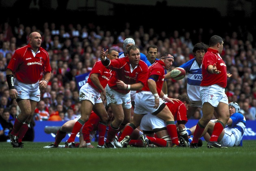

In [39]:
preview("rugby")

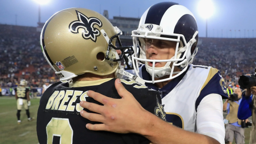

In [28]:
preview("nfl")

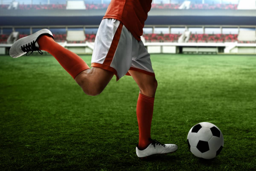

In [31]:
preview("soccer")

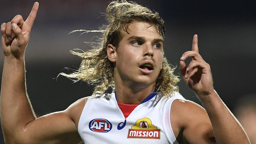

In [32]:
preview("afl")

## Download Dataset

In [43]:
searches = "rugby","afl","nfl","soccer"
dataset_path = data_path/"datasets"

In [44]:
if not (dataset_path).exists():
    for o in searches:
        dest = (dataset_path/o)
        dest.mkdir(parents=True,exist_ok=True)
        results = search_images_ddg(f"{o} game")
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

## Build Data Block

In [45]:
failed = verify_images(get_image_files(dataset_path))
failed.map(Path.unlink)

(#17) [None,None,None,None,None,None,None,None,None,None...]

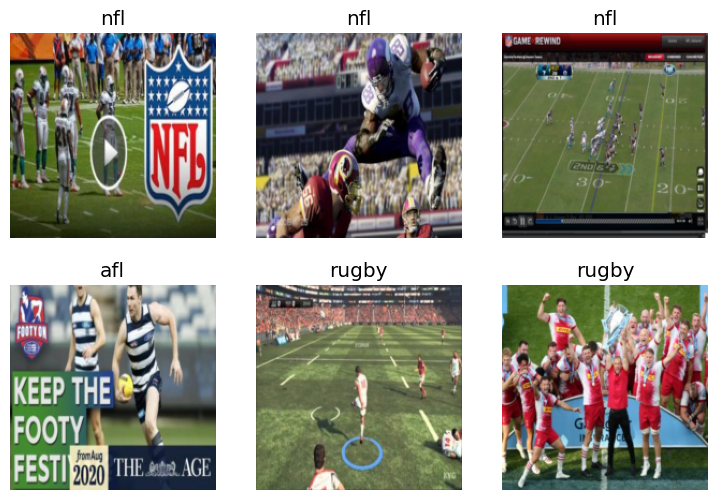

In [46]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(dataset_path)

dls.show_batch(max_n=6)

## Train Model

In [47]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,1.331276,1.282537,0.398230,00:00
1,1.073042,1.108479,0.362832,00:00
2,0.873794,0.998766,0.371681,00:00
3,0.718180,0.987133,0.389381,00:00
4,0.583215,1.016907,0.362832,00:00
5,0.476426,1.067516,0.345133,00:00
6,0.383498,1.137339,0.362832,00:00
7,0.314319,1.200328,0.353982,00:00
8,0.261772,1.208668,0.336283,00:00
9,0.218976,1.175529,0.327434,00:00


## Test Model

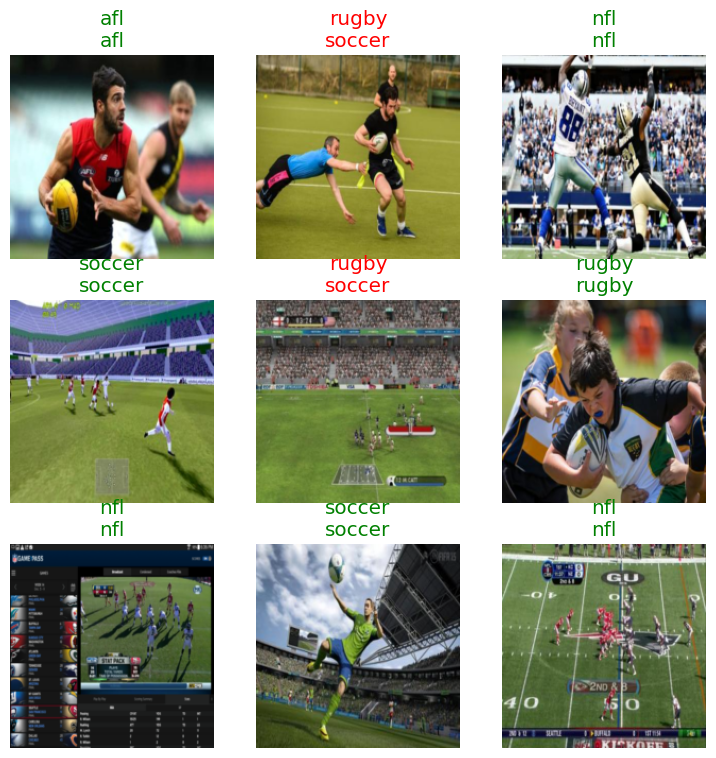

In [64]:
learn.show_results()

In [63]:
sport,_,probs = learn.predict(PILImage.create(data_path/'nfl.jpg'))
print(f"this is {sport}")
print("\n--probabilities--")
for i, o in enumerate(dls.vocab):
    print(f"{o}: {probs[i]:.4f}")

this is nfl

--probabilities--
afl: 0.0008
nfl: 0.9891
rugby: 0.0013
soccer: 0.0089
